In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('files_for_lab/anova_lab_data.xlsx', header=0, names=['power', 'etching_rate'])
data.columns = [columns_name.lower() for columns_name in data.columns]
data.columns = [columns_name.replace(' ', '_') for columns_name in data.columns]
data

,power,etching_rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71
5,200 W,9.20
6,160 W,6.22
7,180 W,5.98
8,200 W,7.90
9,160 W,6.01


In [3]:
data.describe()

,etching_rate
count,15.000000
mean,6.782667
std,1.228643
min,5.430000
25%,5.845000
50%,6.240000
75%,7.725000
max,9.200000


# Part 1

Null hypothesis: there is no significant difference in the mean etching rate for different levels of power.

Alternate hypothesis: There is a significant difference in the mean etching rate for different levels of power.

Significance level: the level of significance (alpha) is typically set at 0.05, which means we are willing to accept a 5% chance of rejecting the null hypothesis when it (null hypothesis) is actually true.

Degrees of freedom: there are 3 groups in this case (k), so it would be (k - 1): 3 - 1 = 2.
Error: the error is N - k, where N is the total number of observations (N = 15 in this case): 15 - 3 = 12.
Total: the total degrees of freedom is N - 1: 15 - 1 = 14.

# Part 2

In [4]:
# First approach - using scipy.stats 

group1 = data[data['power'] == '160 W']['etching_rate']
group2 = data[data['power'] == '180 W']['etching_rate']
group3 = data[data['power'] == '200 W']['etching_rate']

f_statistic, p_value = f_oneway(group1, group2, group3)

print("F-Statistic: ", f_statistic)
print("P-Value: ", p_value)

F-Statistic:  36.87895470100505
P-Value:  7.506584272358903e-06


In [5]:
# Second approach - using statsmodel

model = ols('etching_rate ~ C(power)', data=data).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(power),2.0,18.176653,9.088327,36.878955,0.000008
Residual,12.0,2.957240,0.246437,NaN,NaN


Since the p-value (7.506584272358903e-06, or 0.000008) is less than the significance level of 0.05, we reject the null hypothesis and conclude that there is a significant difference in the mean etching rate for different levels of power.

F-statistic, used to determine whether the variance between the group means is significantly greater than the variance within the groups, tell us by being relatively large that the variability between group means is much larger than the variability within each group. Therefore, in this case, the F-statistic value being 36.88, indicates that there is a significant difference in the mean etching rate across different levels of power. The p-value being very small further confirms this. Therefore, we can conclude that there is a statistically significant effect of the power on the etching rate.

#### The F-table can be used to cross-check the results obtained from the Python analysis.

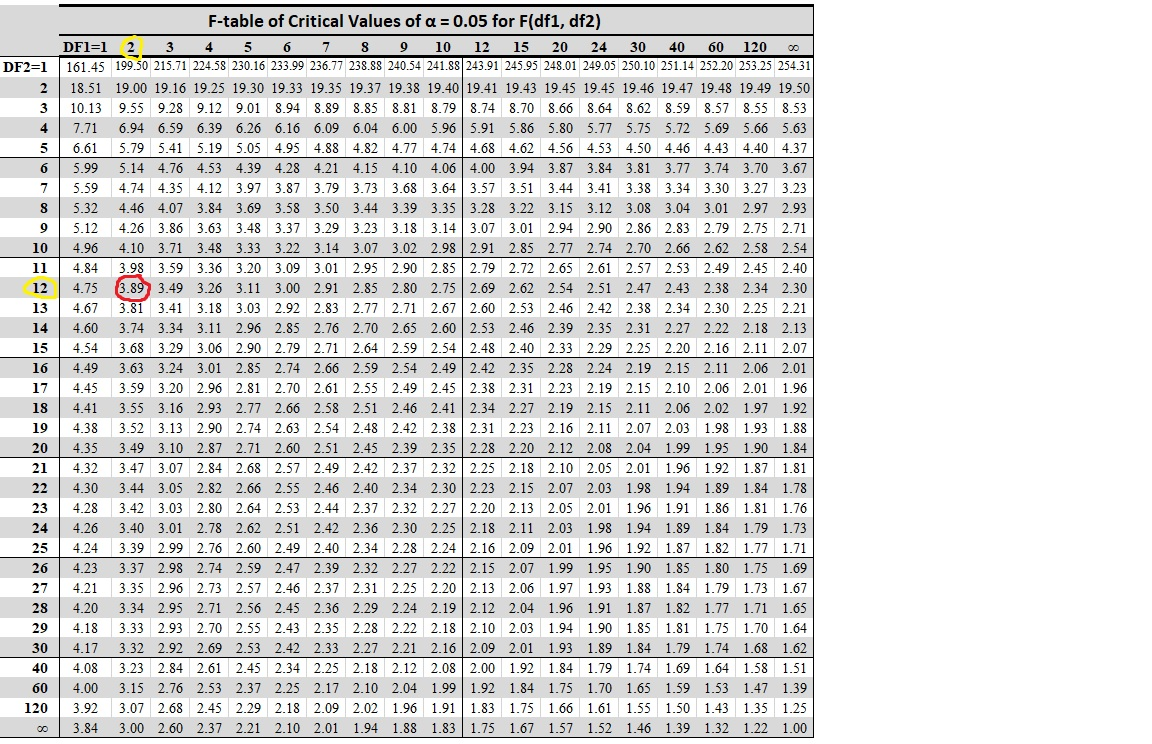

If the calculated F-statistic (36.87 in this case) is larger than the critical value (3.89 in this case for the chosen significance level of 0.05), then the null hypothesis should be rejected, and there is evidence that at least one mean is different from the others.

#### The ANOVA test only tells us that there is at least one mean that is different from the others. But, which is it?

In [6]:
groups = data['power'].unique()
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1 = data[data['power'] == groups[i]]['etching_rate']
        group2 = data[data['power'] == groups[j]]['etching_rate']
        result = ttest_ind(group1, group2)
        print(f"T-test between power {groups[i]} and {groups[j]}:\n {result}\n")

T-test between power 160 W and 180 W:
 Ttest_indResult(statistic=-1.84892009935179, pvalue=0.10164495449539465)

T-test between power 160 W and 200 W:
 Ttest_indResult(statistic=-7.611403634613074, pvalue=6.237977344615716e-05)

T-test between power 180 W and 200 W:
 Ttest_indResult(statistic=-5.827496614588661, pvalue=0.0003926796476049085)



The results show the outcome of performing t-tests between pairs of the mean etching rates for different power levels.

For the comparison between 160 W and 180 W, the t-test resulted in a statistic of -1.849 and a p-value of 0.102. The p-value is greater than the chosen level of significance (0.05), so there is not enough evidence to reject the null hypothesis that the means of the two groups are equal. Therefore, there is no significant difference in the mean etching rate between 160 W and 180 W.

For the comparison between 160 W and 200 W, the t-test resulted in a statistic of -7.611 and a p-value of 6.238e-05, which is much smaller than the chosen level of significance. Therefore, there is strong evidence to reject the null hypothesis that the means of the two groups are equal, and conclude that the mean etching rate is significantly different between 160 W and 200 W.

For the comparison between 180 W and 200 W, the t-test resulted in a statistic of -5.827 and a p-value of 0.00039, which is also much smaller than the chosen level of significance. Therefore, there is strong evidence to reject the null hypothesis that the means of the two groups are equal, and conclude that the mean etching rate is significantly different between 180 W and 200 W.

In summary, based on the t-test results, we can conclude that there is a significant difference in the mean etching rate between 160 W and 200 W, and between 180 W and 200 W, but not between 160 W and 180 W.